In [1]:
import json
import os
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /home/cahou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/cahou/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
lv = pd.read_csv("../data/raw/Las_Vegas_reviews.csv")

In [3]:
lv[70:].business_id

70        fhNf_sg-XzZ3e7HEVGuOZg
71        fhNf_sg-XzZ3e7HEVGuOZg
72        fhNf_sg-XzZ3e7HEVGuOZg
73        fhNf_sg-XzZ3e7HEVGuOZg
74        fhNf_sg-XzZ3e7HEVGuOZg
                   ...          
595535    lsLelczQjIZLHVt2-e44lA
595536    lsLelczQjIZLHVt2-e44lA
595537    lsLelczQjIZLHVt2-e44lA
595538    lsLelczQjIZLHVt2-e44lA
595539    lsLelczQjIZLHVt2-e44lA
Name: business_id, Length: 595470, dtype: object

In [4]:
# with open('../data/autophrase_in/reviews.txt', 'w') as f:
#     f.write('test')
# with open('../data/autophrase_out/segmentation.txt', 'r') as f:
with open('../../DSC180A-Project/data/out/segmentation.txt', 'r') as f:
# with open('../../DSC180A-Project/data/in/yelp_reviews2.txt', 'r') as f:
    reviews_string = f.read()
#     reviews_list = reviews_string.split("\n<REVIEW DELIMITER>\n")
    reviews_list = reviews_string.split("\n.\n")

reviews_list = pd.Series(reviews_list)[:-1]

In [5]:
"\n.\n".join(reviews_list[0:59].to_list())
#reviews_list[0:59].to_list().join("\n.\n")

'So why would I be giving a <phrase>Fast Food chain</phrase> location a 5 <phrase>star</phrase> rating? For some reason, THIS <phrase>Carl\'s Jr</phrase>. is one in a million. Yes, there is an In-and-Out across the street but this <phrase>Carl\'s Jr</phrase> is everything In-and-Out can\'t be. \n\nFirst of all, THEIR SHAKES!!! <phrase>Carl\'s Jr</phrase>. shakes are <phrase>hand scooped</phrase>, and mixed upon <phrase>order</phrase> unlike they\'re competitors across the street. The <phrase>chocolate</phrase> shake IS the best I\'ve EVER had from a <phrase>drive thru</phrase>. Point for <phrase>Carl\'s Jr</phrase>.\n\nSecond, the <phrase>hand battered</phrase> <phrase>chicken</phrase> <phrase>strips</phrase> were literally <phrase>hand battered</phrase>, i <phrase>watch</phrase> the guy through the service window dip and fry. The <phrase>single</phrase> best <phrase>chicken</phrase> <phrase>strips</phrase> i\'ve ever had (but they may need new <phrase>sauces</phrase>, tired of BBQ...b

In [6]:
lv[30888:30890].text.values

array(['Update: After I left my initial review on Lee\'s BBQ members from the marketing reached out to me and wanted me to give the restaurant another chance. They were very apologetic that my experience wasn\'t a pleasant one, and explained that they were making improvements. I was actually very pleased that they reached out to to me though that was very professional. And I agreed to come back. Last night at the spur of the moment my husband decided he wanted to go back and give it s try. I contacted the marketing team through Yelp and let them know. Ben was who I was in touch with, and he promptly called the restaurant to let them know about my experience\nFrom last time. \n   Immediately I noticed the tone of the restaurant was different, they had control of the floor and all customers looked happy and well taken care of by the servers. Also I want to add that there was enough servers for the busy crowd. We went in at about 8pm last night (Sunday) and the restaurant was slammed, eve

In [7]:
len(lv)

595540

In [8]:
595704-595540

164

In [9]:
lv.tail()

,Unnamed: 0,name,business_id,city,categories,review_id,text,stars
595535,595535,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",1BPh4QS80bUS47agxN9UMA,"The service was slow every time we went here, ...",4.0
595536,595536,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",8eTVWv0lBAaYYuUdrWO65Q,Food wasn't that bAd but the service was not s...,3.0
595537,595537,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",abFueTdsvK4xAkmF_53U9w,I absolutely love the décor and color scheme i...,3.0
595538,595538,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",X2STQTenLN4w6LPV0TqIpA,What a cute place! We decided to eat here beca...,4.0
595539,595539,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",hJSatcXA-simo9bgHe_Dkw,I'm so sick of this place! There won't be one ...,1.0


In [10]:
pd.DataFrame(reviews_list[reviews_list.apply(lambda x: len(x)>3)], columns=['text'])#.join(lv, on='text', how='outer')

,text
0,So why would I be giving a <phrase>Fast Food c...
1,I come here bout 3x's a mo. & I just can't do ...
2,<phrase>WORST experience</phrase> EVER!!!!! ne...
3,<phrase>Hot fresh</phrase> <phrase>food</phras...
4,<phrase>Beer battered cod</phrase> <phrase>fis...
...,...
595739,"The service was slow every time we went here, ..."
595740,<phrase>Food</phrase> wasn't that bAd but the ...
595741,I <phrase>absolutely love</phrase> the décor a...
595742,What a <phrase>cute place</phrase>! We decided...


In [11]:
for element in reviews_list:
    if element not in lv.text.values:
        a = element
        break

In [12]:
a

"So why would I be giving a <phrase>Fast Food chain</phrase> location a 5 <phrase>star</phrase> rating? For some reason, THIS <phrase>Carl's Jr</phrase>. is one in a million. Yes, there is an In-and-Out across the street but this <phrase>Carl's Jr</phrase> is everything In-and-Out can't be. \n\nFirst of all, THEIR SHAKES!!! <phrase>Carl's Jr</phrase>. shakes are <phrase>hand scooped</phrase>, and mixed upon <phrase>order</phrase> unlike they're competitors across the street. The <phrase>chocolate</phrase> shake IS the best I've EVER had from a <phrase>drive thru</phrase>. Point for <phrase>Carl's Jr</phrase>.\n\nSecond, the <phrase>hand battered</phrase> <phrase>chicken</phrase> <phrase>strips</phrase> were literally <phrase>hand battered</phrase>, i <phrase>watch</phrase> the guy through the service window dip and fry. The <phrase>single</phrase> best <phrase>chicken</phrase> <phrase>strips</phrase> i've ever had (but they may need new <phrase>sauces</phrase>, tired of BBQ...but still

In [13]:
lv.assign(annotated=reviews_list)

,Unnamed: 0,name,business_id,city,categories,review_id,text,stars,annotated
0,0,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",WUAt5-krh075Ie44np8Hew,So why would I be giving a Fast Food chain loc...,5.0,So why would I be giving a <phrase>Fast Food c...
1,1,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",S9vIs-je49jqbhpWSQ8yHg,I come here bout 3x's a mo. & I just can't do ...,2.0,I come here bout 3x's a mo. & I just can't do ...
2,2,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",i2Soid_X8XsSTyIrPOst6g,WORST experience EVER!!!!! never have i ate an...,1.0,<phrase>WORST experience</phrase> EVER!!!!! ne...
3,3,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",uDYGaAOUgo7SLuH5nUZs3w,Hot fresh food usually. Staff seems to turn o...,4.0,<phrase>Hot fresh</phrase> <phrase>food</phras...
4,4,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",Xg7HuBvuZHTBog1G_2Wk0w,Beer battered cod fish seems really rubbery. I...,3.0,<phrase>Beer battered cod</phrase> <phrase>fis...
...,...,...,...,...,...,...,...,...,...
595535,595535,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",1BPh4QS80bUS47agxN9UMA,"The service was slow every time we went here, ...",4.0,Ate here for breakfast twice on my last <phras...
595536,595536,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",8eTVWv0lBAaYYuUdrWO65Q,Food wasn't that bAd but the service was not s...,3.0,"<phrase>Food</phrase> was good, but service wa..."
595537,595537,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",abFueTdsvK4xAkmF_53U9w,I absolutely love the décor and color scheme i...,3.0,I ate here 2 times during my vacations at the ...
595538,595538,S+O Restaurant,lsLelczQjIZLHVt2-e44lA,Las Vegas,"American (Traditional), Restaurants, American ...",X2STQTenLN4w6LPV0TqIpA,What a cute place! We decided to eat here beca...,4.0,Let me start by saying that I <phrase>LOVE</ph...


In [14]:
lv[lv['business_id']=='fnZrZlqW1Z8iWgTVDfv_MA'] # carl's junior
# lv[lv['business_id']=='fhNf_sg-XzZ3e7HEVGuOZg'] # meat chix

,Unnamed: 0,name,business_id,city,categories,review_id,text,stars
0,0,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",WUAt5-krh075Ie44np8Hew,So why would I be giving a Fast Food chain loc...,5.0
1,1,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",S9vIs-je49jqbhpWSQ8yHg,I come here bout 3x's a mo. & I just can't do ...,2.0
2,2,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",i2Soid_X8XsSTyIrPOst6g,WORST experience EVER!!!!! never have i ate an...,1.0
3,3,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",uDYGaAOUgo7SLuH5nUZs3w,Hot fresh food usually. Staff seems to turn o...,4.0
4,4,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",Xg7HuBvuZHTBog1G_2Wk0w,Beer battered cod fish seems really rubbery. I...,3.0
5,5,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",aVS7AupIceADC-xTmyjPDw,"Great burgers, chicken sandwiches, salads, and...",5.0
6,6,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",pzEx8PT7n5d84-y5x46dTQ,I went here because of long line at IN n OUT a...,1.0
7,7,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",eDqCFNQyAv74NID-BcT5KA,"Food was alright, but with only 1 person ahead...",2.0
8,8,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",snRJkwDEB_A7xz83cYqO1w,I haven't tried much on their menu but their c...,3.0
9,9,Carl's Jr,fnZrZlqW1Z8iWgTVDfv_MA,Las Vegas,"Mexican, Restaurants, Fast Food",baoWrBWaH_WdDrLhnN11NA,I'm a Carl's Jr fan for their fried zucchini a...,4.0


In [15]:
sid = SentimentIntensityAnalyzer()

In [16]:
POS=0.3
NEG=-POS

In [17]:
ind = 1
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer.tokenize(reviews_list[ind])

["I come here bout 3x's a mo.",
 "& I just can't do it anymore.",
 'The cook that works on <phrase>late shift</phrase> SUCKS.',
 'The <phrase>manager</phrase> is sweet.',
 'I always get <phrase>chicken</phrase> <phrase>Santa Fe</phrase> & I have to request <phrase>fresh lettuce</phrase>.',
 'The <phrase>chicken</phrase> is <phrase>rubber</phrase>, the <phrase>bread</phrase> hard on the outside.',
 "Tonight I received it the same way however my <phrase>cheese</phrase> wasn't even melted.",
 'IM DONE!',
 'I go after work arrive always bout 1130pm.',
 "I'm sooooo DONE!!!",
 'Let me know when u get a new night cook!',
 "Yes I do know <phrase>food</phrase> I've been in the <phrase>industry</phrase> 15 yrs."]

In [18]:
def sentiment_score(reviews_list):
    '''Attach a sentiment score to each sentence of a review. Return DataFrame.'''
    scores = []
    seen_sentences = []
    index = []
    for i, review in enumerate(reviews_list):
        sentences = tokenizer.tokenize(review)
        for sentence in sentences:
            index.append(i)
            seen_sentences.append(sentence)
            ss_intermediate = sid.polarity_scores(sentence)
            scores.append(ss_intermediate)
    df = pd.DataFrame({'index': index, 'sentence': seen_sentences}).join(pd.DataFrame(scores))
    df = df.assign(phrases = df.sentence.apply(lambda x: re.findall('<phrase>.+?</phrase>', x)))
    return df

def clean_phrases(sentences):
    '''Remove the phrase tags'''
    return sentences.str.replace('<phrase>', '').str.replace('</phrase>', '')

def make_positive_phrases(df, val):
    '''Return positive phrases'''
    return clean_phrases(df[['compound', 'phrases']][df['compound']>=val].phrases.explode().dropna()).value_counts()

def make_negative_phrases(df, val):
    '''Return positive phrases'''
    return clean_phrases(df[['compound', 'phrases']][df['compound']<=-val].phrases.explode().dropna()).value_counts()

In [19]:
VAL = 0.3
df = sentiment_score(reviews_list[0:59])
positive_phrases = make_positive_phrases(df, VAL)
negative_phrases = make_negative_phrases(df, VAL)

In [20]:
def make_sentimented_restaurant(reviews_list, VAL):
    df = sentiment_score(reviews_list)
    positive_phrases = make_positive_phrases(df, VAL)
    negative_phrases = make_negative_phrases(df, VAL)
    return df, positive_phrases, negative_phrases

In [21]:
clean_phrases(df[df['compound']>=POS].sentence).values

array(['So why would I be giving a Fast Food chain location a 5 star rating?',
       "The chocolate shake IS the best I've EVER had from a drive thru.",
       "The single best chicken strips i've ever had (but they may need new sauces, tired of BBQ...but still outstanding nonetheless).",
       'Brilliant for my late night guru-ness.', 'The manager is sweet.',
       "Yes I do know food I've been in the industry 15 yrs.",
       'Bad place to put them right across from in n out, but when in n out is busy this is a good alternative.',
       "Don't try the new Texas burger, get the Memphis instead(much better deal).",
       'Burger isn\'t bad once you take them off, but then again it\'s pretty much a Memphis with less "brisket."',
       'Can enjoy the $6 dollar burger either with bun or low carb style.',
       "I haven't tried much on their menu but their chicken guacamole burger is good, and so is their turkey burger.",
       'However... they advertise hand breaded chicken finger

In [22]:
clean_phrases(df[['compound', 'phrases']][df['compound']>=POS].phrases.explode().dropna()).value_counts()

chicken             16
Memphis              8
guru                 4
Fast Food chain      4
industry             4
bit                  4
waffle               4
drive thru           4
classics             4
turkey               4
brisket              4
manager              4
town                 4
Carl's Jr            4
star                 4
guacamole            4
strips               4
sauces               4
low carb             4
fast food            4
late night           4
food                 4
customer service     4
dollar burger        4
fried zucchini       4
bun                  4
hand breaded         4
single               4
chocolate            4
alternative          4
Texas                4
fries                4
sandwich             4
Teriyaki             3
Chicken              3
Minute Maid          3
low calorie          3
Lemonade             3
taste                3
Light                3
Sandwich             3
Name: phrases, dtype: int64

In [23]:
clean_phrases(df[df['compound']<=NEG].sentence).values

array(['The cook that works on late shift SUCKS.',
       'never have i ate anywhere to the level of grossness this place offered.',
       'So after being in shock of what just happened i took the bun off once again and saw some of my lettuce was black.',
       'And the worst part it that the chicken patty was grey with some spots of meat missing inside its really hard to explain when i called the manager she really was not too concerned with the quality offered me to remake the burger .',
       'So when i got there i went inside for my refund and it was not the best looking inside either all the employees seemed to not even care that they served me that and they gave me a small fountain cup while i waited and the soda was flat.',
       'I then realized the problem is with management and not running that location right.',
       'Lack of employee quality.', 'The jalapeño straws are worthless!',
       'The bad part is they are over priced for em though.',
       'Their restraints h

In [24]:
clean_phrases(df[['compound', 'phrases']][df['compound']<=NEG].phrases.explode().dropna()).value_counts()

manager       8
lettuce       4
food          4
chicken       4
fountain      4
bun           4
management    4
remake        4
black         4
jalapeño      4
meat          4
late shift    4
restaurant    4
Name: phrases, dtype: int64

In [25]:
df, positive_phrases, negative_phraes = make_sentimented_restaurant(reviews_list[0:59], VAL)

In [26]:
positive_phrases[0:5]#[0:10]

chicken            16
Memphis             8
guru                4
Fast Food chain     4
industry            4
Name: phrases, dtype: int64

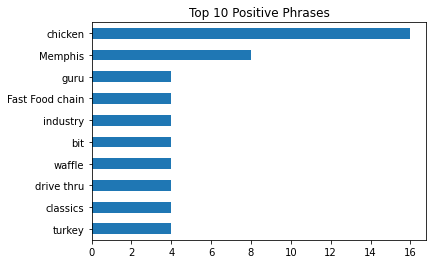

In [27]:
positive_phrases[0:10].plot.barh(title='Top 10 Positive Phrases').invert_yaxis()

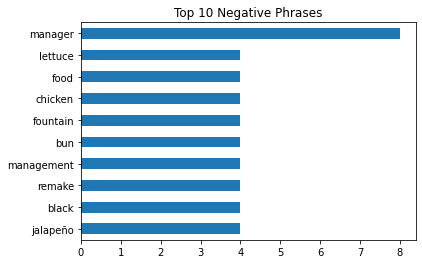

In [28]:
negative_phrases[0:10].plot.barh(title='Top 10 Negative Phrases').invert_yaxis()

In [44]:
df = df.assign(tokens=df.sentence.str.split(' '))

In [48]:
df = df.assign(tokens=df.tokens.apply(lambda x: len(x)))

In [63]:
df_rev = df.groupby('index')[['compound', 'tokens']].sum()

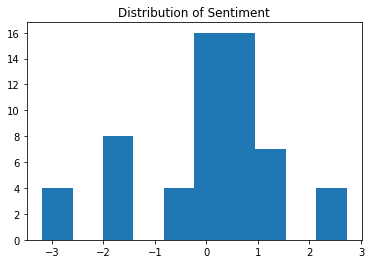

In [72]:
plt.hist(df_rev.compound)
plt.title(label='Distribution of Sentiment')
plt.show()

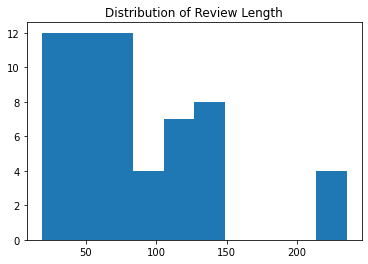

In [73]:
plt.hist(df_rev.tokens)
plt.title(label='Distribution of Review Length')
plt.show()

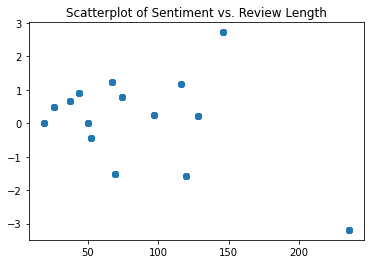

In [69]:
plt.scatter(x=df_rev['tokens'], y=df_rev['compound'])
plt.title("Scatterplot of Sentiment vs. Review Length")
plt.show()

In [77]:
positive_phrases

chicken             16
Memphis              8
guru                 4
Fast Food chain      4
industry             4
bit                  4
waffle               4
drive thru           4
classics             4
turkey               4
brisket              4
manager              4
town                 4
Carl's Jr            4
star                 4
guacamole            4
strips               4
sauces               4
low carb             4
fast food            4
late night           4
food                 4
customer service     4
dollar burger        4
fried zucchini       4
bun                  4
hand breaded         4
single               4
chocolate            4
alternative          4
Texas                4
fries                4
sandwich             4
Teriyaki             3
Chicken              3
Minute Maid          3
low calorie          3
Lemonade             3
taste                3
Light                3
Sandwich             3
Name: phrases, dtype: int64